# Mobile Device Usage and User behavior

## 1. Introducción:

Este dataset examina el comportamiento de los usuarios en dispositivos móviles, <br>
proporcionando información sobre patrones de uso, tiempo invertido en aplicaciones, y preferencias de los usuarios.<br>

### 1.1 Objetivo del análisis:

Identificar tendencias clave en el uso de dispositivos móviles y explorar correlaciones entre variables.

## 2. Recolección de datos:
Fuente: La fuente de este dataset es Kaggle.<br>
Características del dataset: Tiene un total de 700 registros y 11 columnas.

## 3. Pre-procesamiento y limpieza de datos

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
df = pd.read_csv('data/user_behavior_data.csv')

### Data exploration

In [3]:
df.head(3)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [5]:
df.shape

(700, 11)

### 3.1 Verificación de datos del dataset:

Confirmación de integridad: No hay datos nulos ni duplicados.<br>
Verificación de formatos: Las columnas están en el formato correcto y no requieren ajustes adicionales.

## 4. Análisis exploratorio de datos (EDA)

### 4.1. Data exploration - column specific

#### 4.1.1. Device Model

##### Frequencia absoluta
Number of times each value appears

In [8]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

##### Frecuencia relativa
The proportion of each value's occurrence relative to the total number of data points

In [7]:
df['Device Model'].value_counts(normalize=True)

Device Model
Xiaomi Mi 11          0.208571
iPhone 12             0.208571
Google Pixel 5        0.202857
OnePlus 9             0.190000
Samsung Galaxy S21    0.190000
Name: proportion, dtype: float64

##### Conteo de categorias únicas
Número de categorias únicas en la columna

In [9]:
unico_dm = df['Device Model'].nunique()

print(f"El número total de categorias es: {unico_dm}")

El número total de categorias es: 5


##### Moda
Encontrar la categoria más común

In [10]:
df['Device Model'].mode()

0    Xiaomi Mi 11
1       iPhone 12
Name: Device Model, dtype: object

##### Gráfico de barras
Frecuencia o proporción de cada categoría. Ideal para comparar visualmente la popularidad de las categorias.

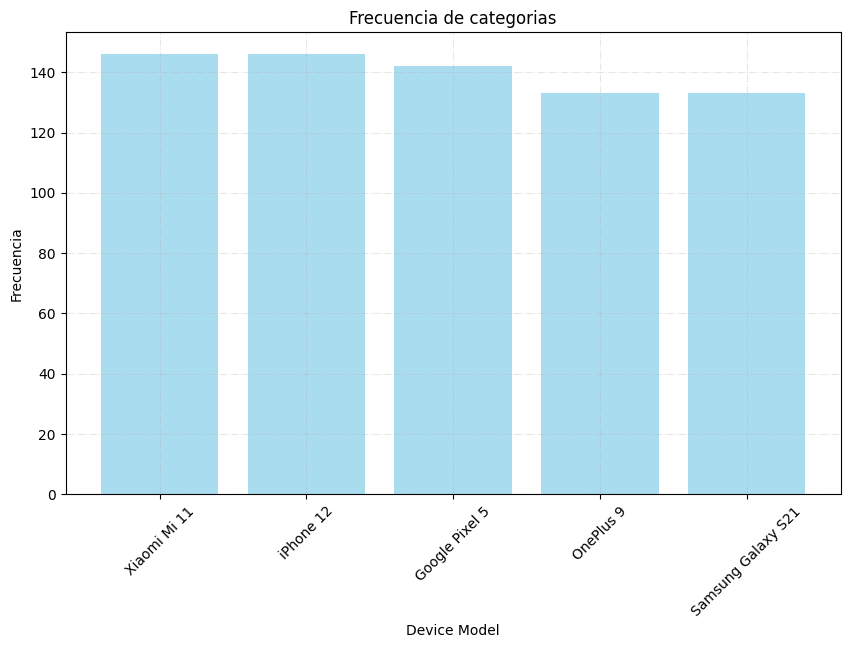

In [21]:
#Calcular la frecuencia de cada categoria
frecuencias = df['Device Model'].value_counts()

categorias = frecuencias.index
conteo = frecuencias.values

plt.figure(figsize=(10,6))
plt.bar(categorias, conteo, alpha=0.7, color='skyblue')

plt.grid(alpha=0.3, linestyle='-.')

plt.title('Frecuencia de categorias')
plt.xlabel('Device Model')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.show()

##### Diagrama de pizza
Presenta la proporción de cada categoría en un formato circular.

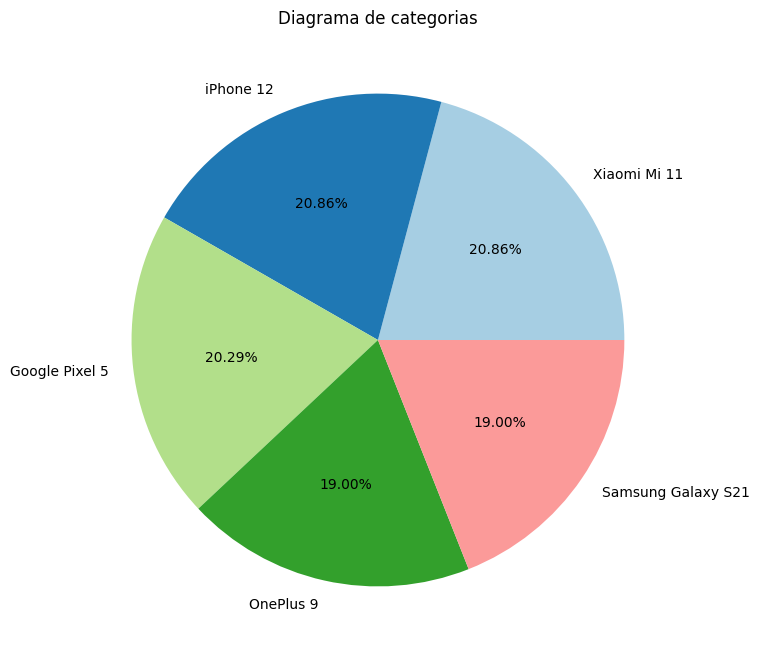

In [36]:
#calcular la proporcion de cada categoria
proporciones = df['Device Model'].value_counts(normalize=True)

#crear el diagrama de torta
plt.figure(figsize=(8,8)) # Tamaño del gráfico
plt.pie(proporciones, labels=proporciones.index, autopct='%1.2f%%', colors=plt.cm.Paired.colors)

# proporciones: Contiene los datos para el gráfico
# labels: son las etiquetas de cada categoria
# autopct: muestra el porcentaje en cada segmento del gráfico
# colors: asigna una paleta de colores para los sectores

# titulo
plt.title('Diagrama de categorias')

#Mostrar el gráfico
plt.show()

##### Diagrama de dona

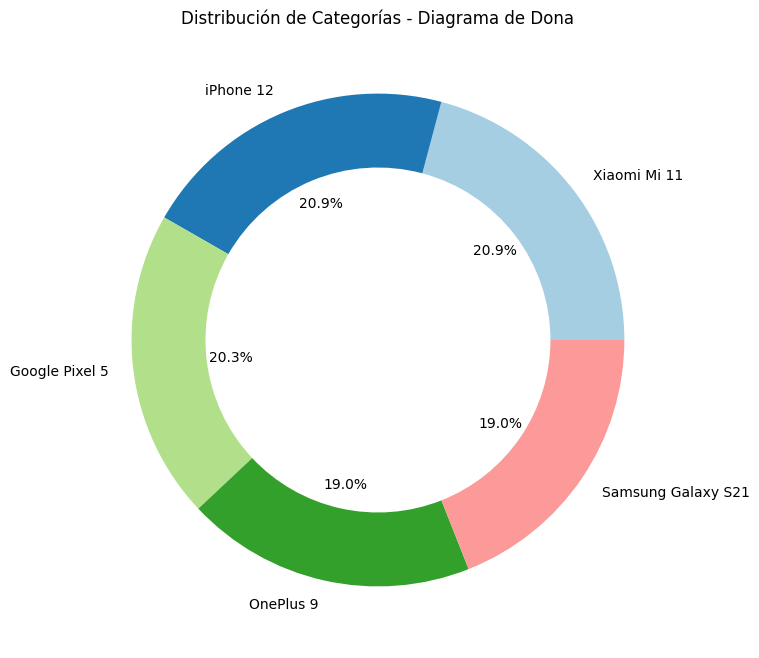

In [37]:
proporciones = df['Device Model'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(proporciones, labels=proporciones.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors,
        wedgeprops={'width': 0.3})  # 'width' controla el ancho del sector para crear la forma de dona
# - 'proporciones' contiene los datos para el gráfico
# - 'labels' son las etiquetas de cada categoría
# - 'autopct' muestra el porcentaje en cada segmento del gráfico
# - 'colors' asigna una paleta de colores para los sectores
# - 'wedgeprops' con 'width' ajusta el ancho del sector para crear el agujero

plt.title('Distribución de Categorías - Diagrama de Dona')  # Título del gráfico

plt.show()

##### Gráfico de pareto
Combina un gráfico de barras con una línea que muestra la acumulación de frecuencia relativa.

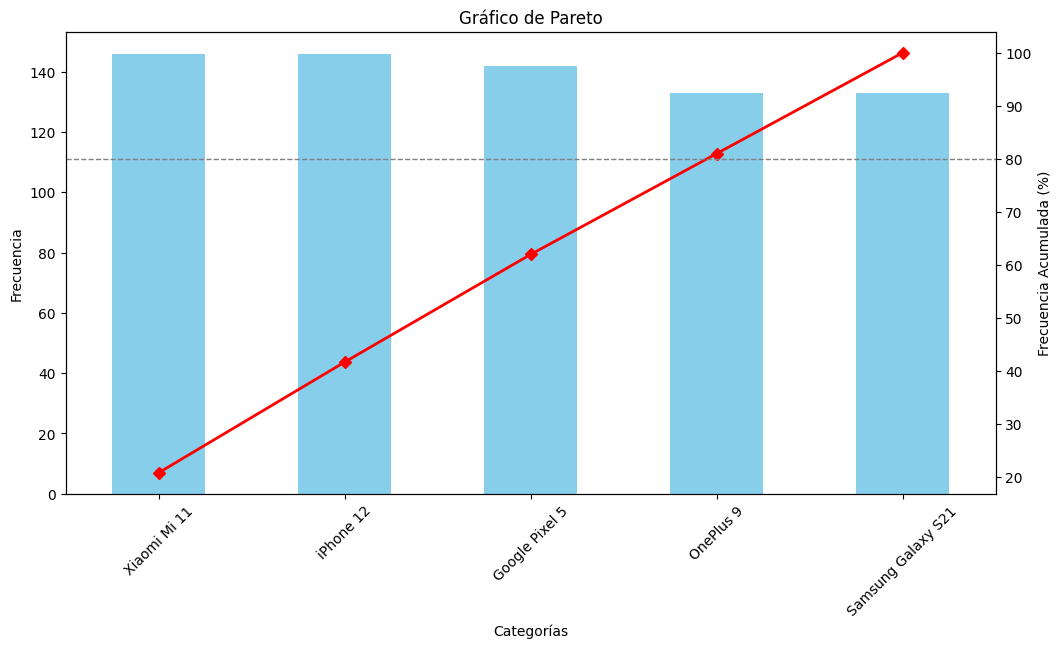

In [38]:
# Calcula la frecuencia de cada categoría en orden descendente
frecuencias = df['Device Model'].value_counts()

# Calcula la frecuencia acumulativa en porcentaje
frecuencia_acumulada = frecuencias.cumsum() / frecuencias.sum() * 100

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))  # Establece el tamaño del gráfico

# Gráfico de barras para las frecuencias
frecuencias.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Gráfico de Pareto')
ax1.set_xlabel('Categorías')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje x

# Gráfico de línea para la frecuencia acumulada
ax2 = ax1.twinx()  # Crea un segundo eje y
ax2.plot(frecuencia_acumulada, color='red', marker='D', linestyle='-', linewidth=2)
ax2.set_ylabel('Frecuencia Acumulada (%)')

# Agrega una línea horizontal al 80% para referencia
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)

# Mostrar el gráfico
plt.show()

#### 4.1.2. Operating system

##### Frecuencia absoluta

In [14]:
df['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

##### Frecuencia relativa

In [15]:
df['Operating System'].value_counts(normalize=True)

Operating System
Android    0.791429
iOS        0.208571
Name: proportion, dtype: float64

##### Conteo de categorias únicas

In [16]:
os_un = df['Operating System'].nunique()
print(f"El número de categorias en la columna es de {os_un}")

El número de categorias en la columna es de 2


##### Moda

In [17]:
df['Operating System'].mode()

0    Android
Name: Operating System, dtype: object

##### Gráfico de barras

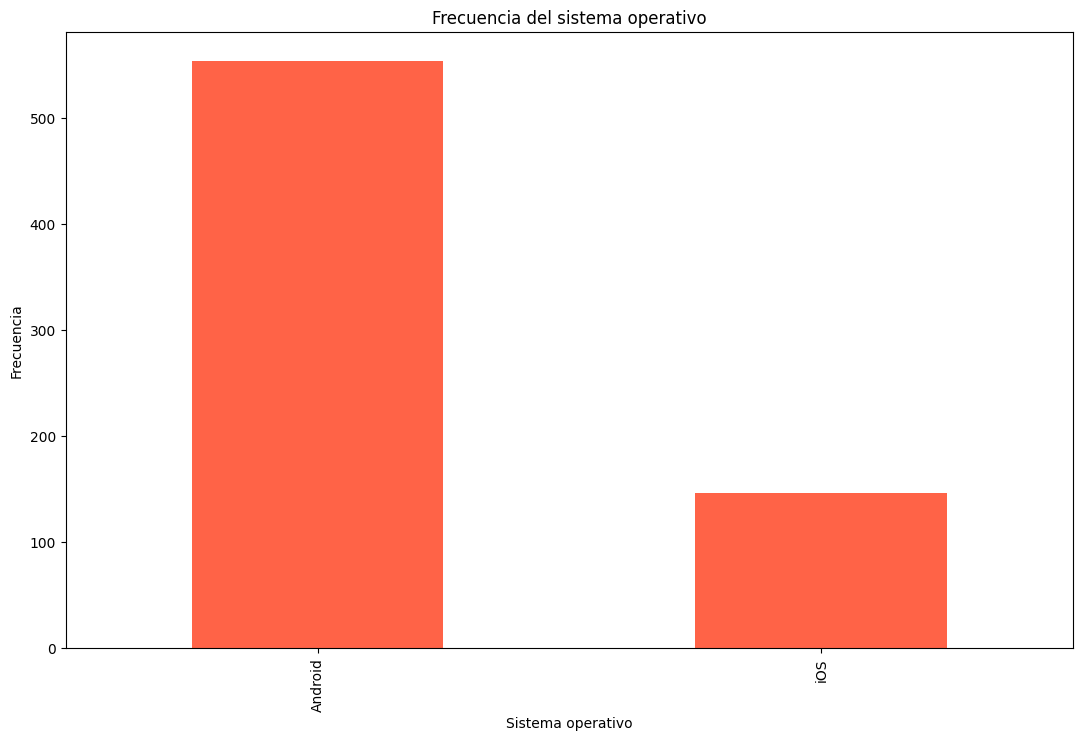

In [18]:
freq = df['Operating System'].value_counts()
plt.figure(figsize=(13,8))
freq.plot(kind='bar', color='tomato')

plt.title('Frecuencia del sistema operativo')
plt.xlabel("Sistema operativo")
plt.ylabel('Frecuencia')

plt.show()

##### Diagrama de pizza

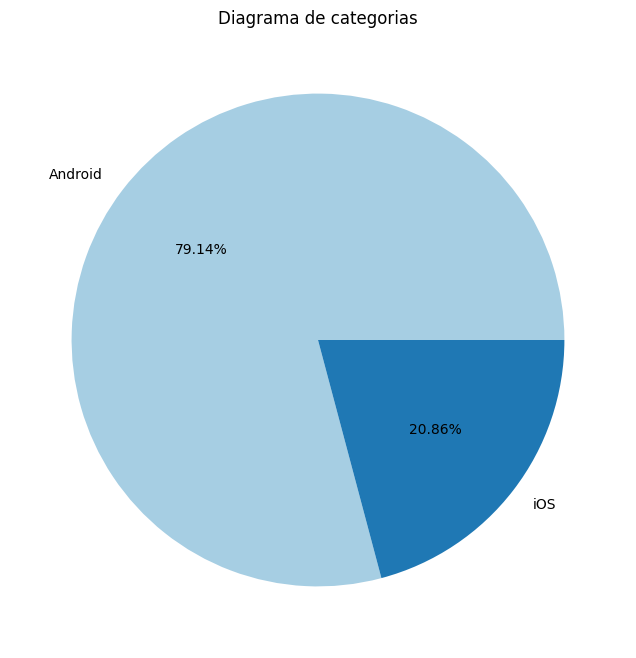

In [19]:
#calcular la proporcion de cada categoria
proporciones_os = df['Operating System'].value_counts(normalize=True)

#crear el diagrama de torta
plt.figure(figsize=(8,8)) # Tamaño del gráfico
plt.pie(proporciones_os, labels=proporciones_os.index, autopct='%1.2f%%', colors=plt.cm.Paired.colors)

# proporciones: Contiene los datos para el gráfico
# labels: son las etiquetas de cada categoria
# autopct: muestra el porcentaje en cada segmento del gráfico
# colors: asigna una paleta de colores para los sectores

# titulo
plt.title('Diagrama de categorias')

#Mostrar el gráfico
plt.show()

##### Diagrama de dona

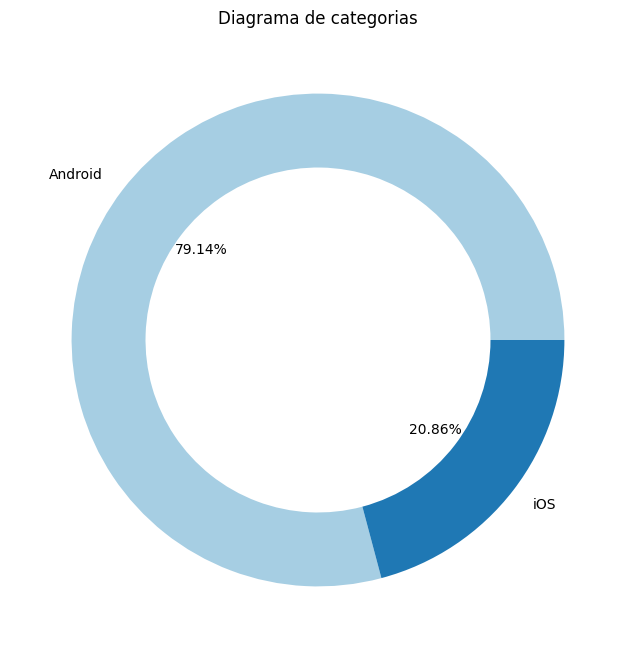

In [20]:
#calcular la proporcion de cada categoria
proporciones_os = df['Operating System'].value_counts(normalize=True)

#crear el diagrama de torta
plt.figure(figsize=(8,8)) # Tamaño del gráfico
plt.pie(proporciones_os, labels=proporciones_os.index, autopct='%1.2f%%', colors=plt.cm.Paired.colors, wedgeprops={'width': 0.3})

# proporciones: Contiene los datos para el gráfico
# labels: son las etiquetas de cada categoria
# autopct: muestra el porcentaje en cada segmento del gráfico
# colors: asigna una paleta de colores para los sectores

# titulo
plt.title('Diagrama de categorias')

#Mostrar el gráfico
plt.show()

##### Gráfico de pareto

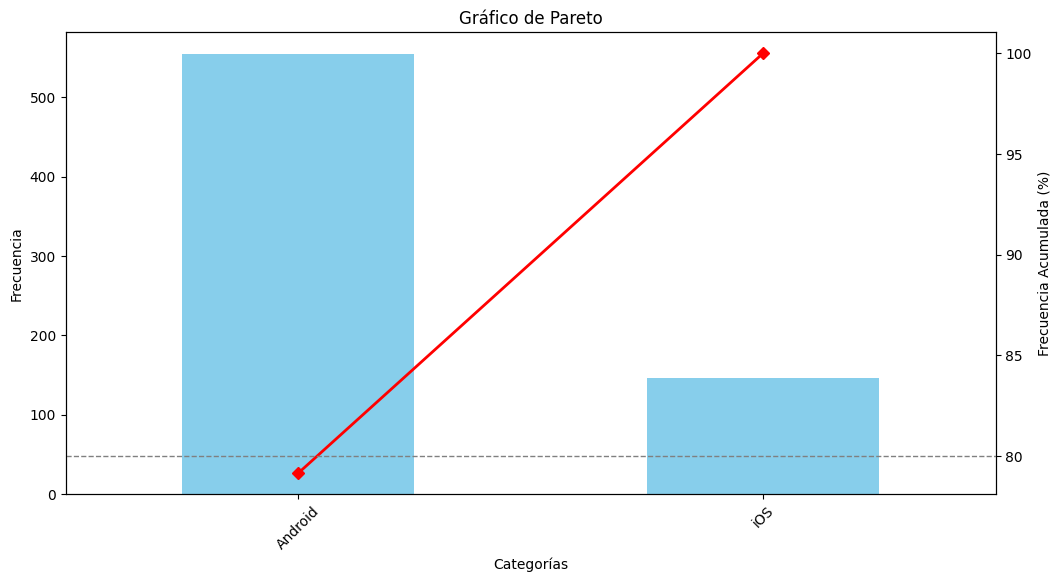

In [21]:
# Calcula la frecuencia de cada categoría en orden descendente
frecuencias_os = df['Operating System'].value_counts()

# Calcula la frecuencia acumulativa en porcentaje
frecuencia_acumulada_os = frecuencias_os.cumsum() / frecuencias_os.sum() * 100

# Crear el gráfico de Pareto
fig_os, ax1_os = plt.subplots(figsize=(12, 6))  # Establece el tamaño del gráfico

# Gráfico de barras para las frecuencias
frecuencias_os.plot(kind='bar', color='skyblue', ax=ax1_os)
ax1_os.set_title('Gráfico de Pareto')
ax1_os.set_xlabel('Categorías')
ax1_os.set_ylabel('Frecuencia')
ax1_os.tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje x

# Gráfico de línea para la frecuencia acumulada
ax2_os = ax1_os.twinx()  # Crea un segundo eje y
ax2_os.plot(frecuencia_acumulada_os, color='red', marker='D', linestyle='-', linewidth=2)
ax2_os.set_ylabel('Frecuencia Acumulada (%)')

# Agrega una línea horizontal al 80% para referencia
ax2_os.axhline(80, color='gray', linestyle='--', linewidth=1)

# Mostrar el gráfico
plt.show()

#### 4.1.3. App Usage Time (min/day)

##### Measures of frequency - Histogram

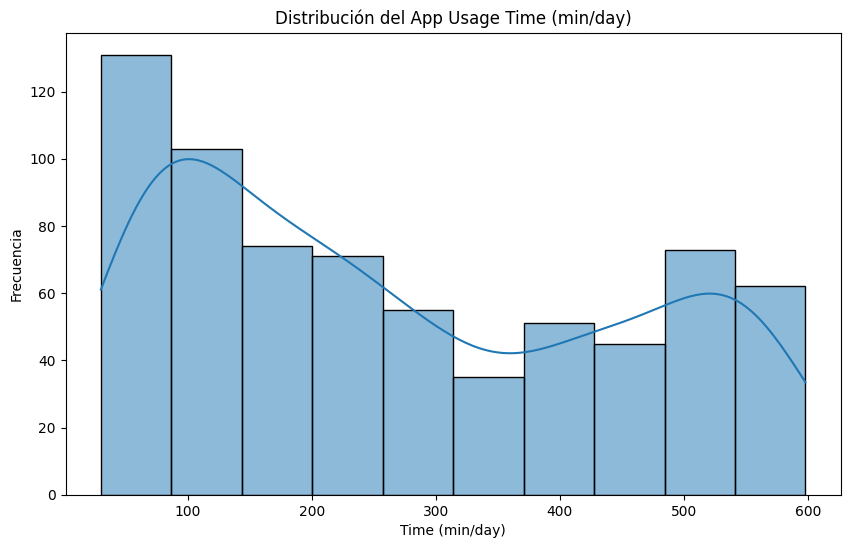

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=10, kde=True)
plt.title('Distribución del App Usage Time (min/day)')
plt.xlabel('Time (min/day)')
plt.ylabel('Frecuencia')
plt.show()

##### Measures of Central tendency and dispersion

In [23]:
df['App Usage Time (min/day)'].describe()

count    700.000000
mean     271.128571
std      177.199484
min       30.000000
25%      113.250000
50%      227.500000
75%      434.250000
max      598.000000
Name: App Usage Time (min/day), dtype: float64

In [ ]:
Usage_Time = df['App Usage Time (min/day)']
media_UT = Usage_Time.mean()
mediana_UT = Usage_Time.median()
moda_UT = Usage_Time.mode()
desviacion_estandar_UT = Usage_Time.std()

print("Media:", media_UT)
print("Mediana:", mediana_UT)
print("Moda:", moda_UT)
print("Desviación Estándar:", desviacion_estandar_UT)

Media: 271.12857142857143
Mediana: 227.5
Moda: 0    64
Name: App Usage Time (min/day), dtype: int64
Desviación Estándar: 177.19948438266206


##### Percentiles y quartiles

In [25]:
#Calcular los cuartiles
Q1_App_u = df['App Usage Time (min/day)'].quantile(0.25) #primer cuartil (25%)
mediana_app_u = df['App Usage Time (min/day)'].quantile(0.5) #Mediana 50%
Q3_App_u = df['App Usage Time (min/day)'].quantile(0.75) #Tercer cuartil (75%)

#Calcular percentiles específicos
percentil_10 = df['App Usage Time (min/day)'].quantile(0.10) #10%
percentil_90 = df['App Usage Time (min/day)'].quantile(0.90) #90%

#Mostrar los resultados
print(Q1_App_u)
print(mediana_app_u)
print(Q3_App_u)
print(percentil_10)
print(percentil_90)

113.25
227.5
434.25
64.0
539.0


##### Boxplot

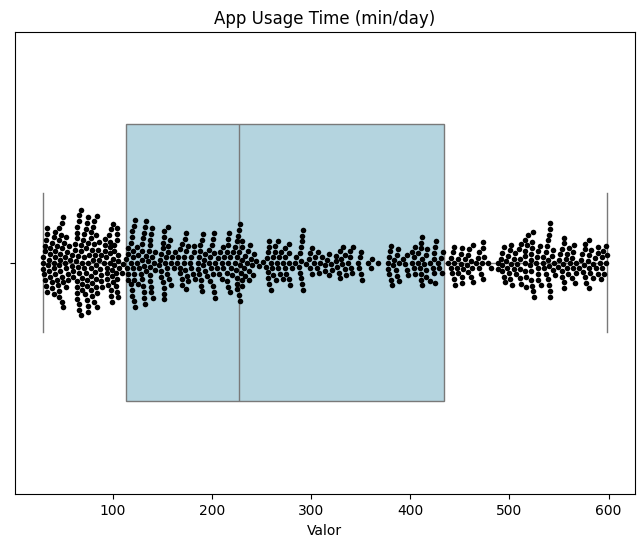

In [26]:

plt.figure(figsize=(8, 6))  # Establece el tamaño del gráfico

# Crear el boxplot
sns.boxplot(x=df['App Usage Time (min/day)'], color='lightblue', width=0.6)  # Color y ancho del boxplot

# Puntos individuales (swarmplot) para mostrar los datos
sns.swarmplot(x=df['App Usage Time (min/day)'], color='black', size=4)  # Color y tamaño de los puntos

# Personalización del gráfico
plt.title('App Usage Time (min/day)')  # Título del gráfico
plt.xlabel('Valor')  # Etiqueta del eje x

# Mostrar el gráfico
plt.show()

#### 4.1.4. Screen On Time (hours/day)

##### Measures of frequency - Histogram

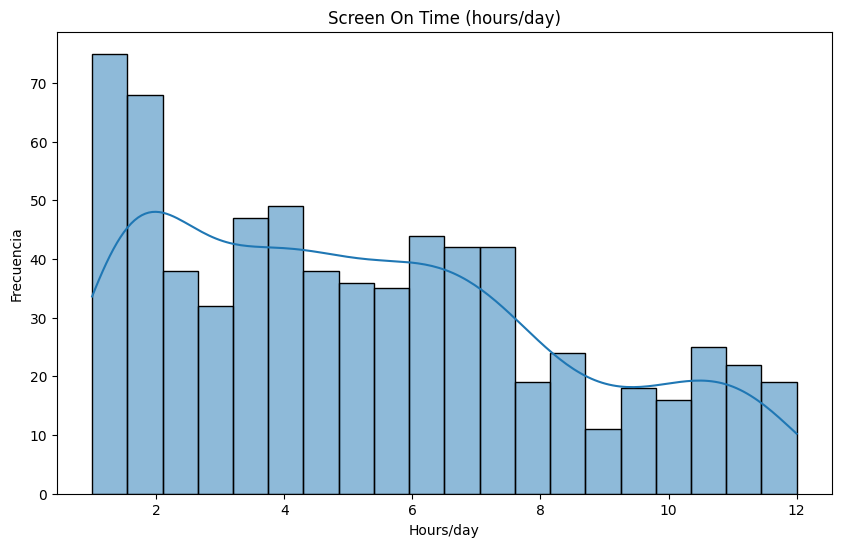

In [27]:
plt.figure(figsize=(10,6))

sns.histplot(df['Screen On Time (hours/day)'], bins=20, kde=True)

plt.title('Screen On Time (hours/day)')
plt.xlabel('Hours/day')
plt.ylabel('Frecuencia')
plt.show()

##### Measures of Central tendency and dispersion

In [28]:
screen_T = df['Screen On Time (hours/day)']
mean_ST = screen_T.mean()
moda_ST = screen_T.mode()
median_ST = screen_T.median()
desviacion_estandar_ST = screen_T.std()

print(mean_ST)
print(moda_ST)
print(median_ST)
print(desviacion_estandar_ST)

5.272714285714286
0    1.6
Name: Screen On Time (hours/day), dtype: float64
4.9
3.0685839102732553


##### Percentiles y quartiles

In [29]:
St_Q = df['Screen On Time (hours/day)']

st_Q1 = St_Q.quantile(0.25) #Primer cuartil 25%
st_Q2 = St_Q.quantile(0.50) #Mediana 50%
st_Q3 = St_Q.quantile(0.75) #Tercer cuartil 75%

percentil_ST_10 = St_Q.quantile(0.10) #Percentil 10%
percentil_ST_90 = St_Q.quantile(0.90) #Percentil 90%

print(st_Q1)
print(st_Q2)
print(st_Q3)
print(percentil_ST_10)
print(percentil_ST_90)

2.5
4.9
7.4
1.5
10.2


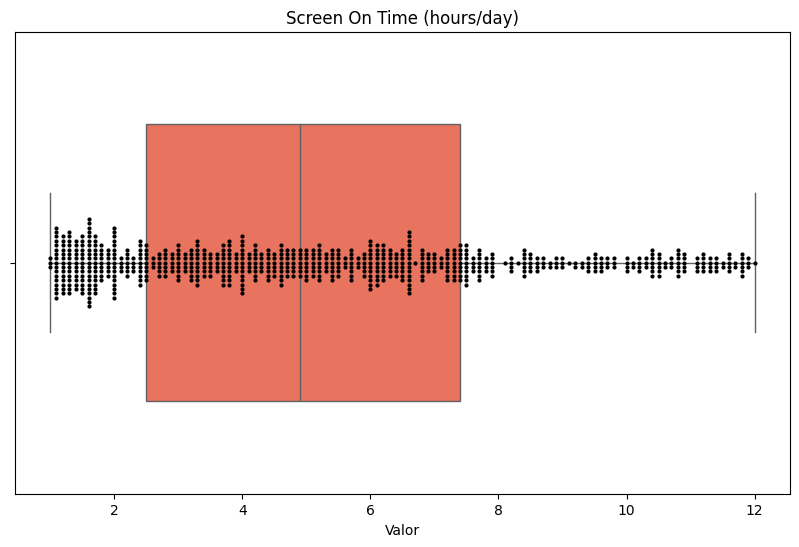

In [30]:
plt.figure(figsize=(10,6))

sns.boxplot(x=St_Q, color='tomato', width=0.6)

sns.swarmplot(x=St_Q, color="black", size=3)

# Personalización del gráfico
plt.title('Screen On Time (hours/day)')  # Título del gráfico
plt.xlabel('Valor')  # Etiqueta del eje x

# Mostrar el gráfico
plt.show()

#### 4.1.5. Battery Drain (mAh/day)

##### Measures of frequency - Histogram

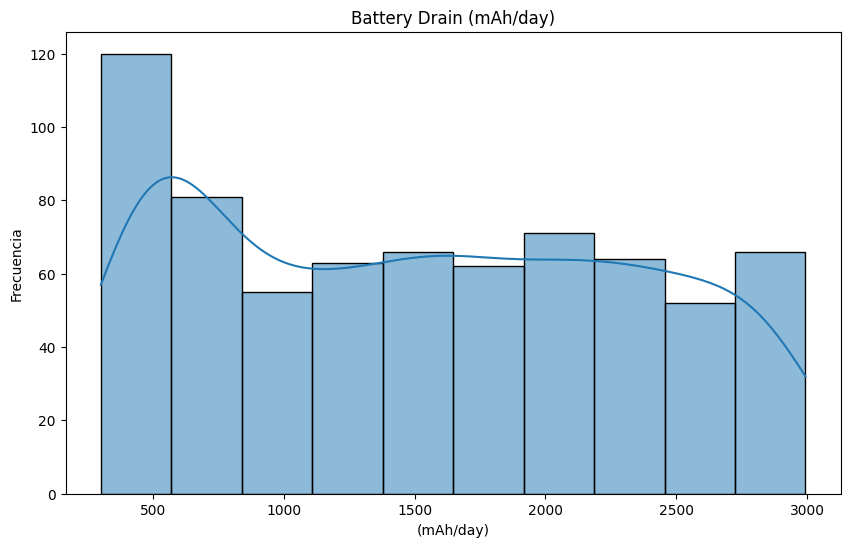

In [44]:
plt.figure(figsize=(10,6))

sns.histplot(df['Battery Drain (mAh/day)'], bins=10, kde=True)

plt.title('Battery Drain (mAh/day)')
plt.xlabel('(mAh/day)')
plt.ylabel('Frecuencia')

plt.show()

##### Measures of Central tendency and dispersion

In [45]:
Bat_Dre = df['Battery Drain (mAh/day)']

mean_BD = Bat_Dre.mean()
mode_BD = Bat_Dre.mode()
median_BD = Bat_Dre.median()
desviacion_estandar_BD = Bat_Dre.std()

print(mean_BD)
print(mode_BD)
print(median_BD)
print(desviacion_estandar_BD)

1525.1585714285713
0    490
Name: Battery Drain (mAh/day), dtype: int64
1502.5
819.1364144757152


##### Percentiles y quartiles

In [48]:
Bd_Q = df['Battery Drain (mAh/day)']

Bd_Q1 = Bd_Q.quantile(0.25) #Percentile 25%
Bd_Q2 = Bd_Q.quantile(0.50) #Mediana 50%
Bd_Q3 = Bd_Q.quantile(0.75) #Percentile 75%

percentil_Bd_10 = Bd_Q.quantile(0.10) #Percentile 10%
percentil_Bd_90 = Bd_Q.quantile(0.90) #Percentile 90%

print(Bd_Q1)
print(Bd_Q2)
print(Bd_Q3)
print(percentil_Bd_10)
print(percentil_Bd_90)

722.25
1502.5
2229.5
461.9
2711.1


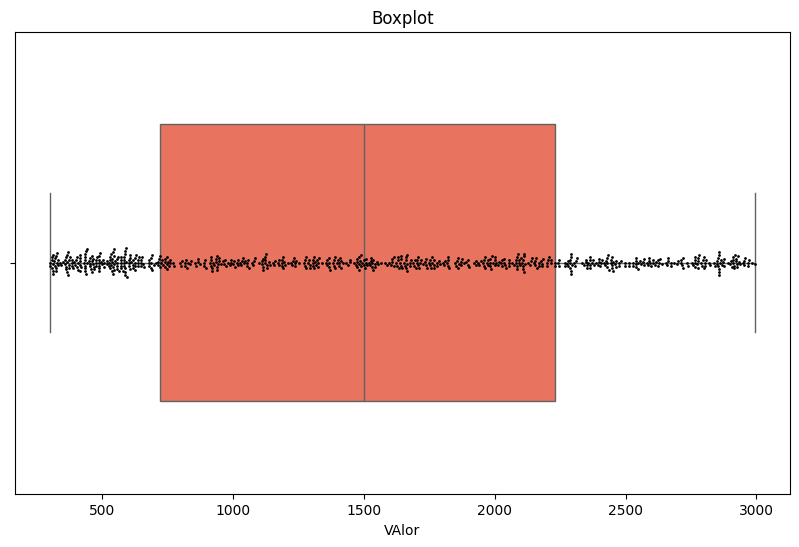

In [53]:
plt.figure(figsize=(10,6))

sns.boxplot(x=Bd_Q, color='tomato', width=0.6)

sns.swarmplot(x=Bd_Q, color='black', size=2)

plt.title('Boxplot')
plt.xlabel('VAlor')

plt.show()